In [1]:
import glob
import pandas as pd
import numpy as np
import os

In [2]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time
import re 

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import confusion_matrix
import joblib

In [6]:
all_file= glob.glob("./songData/*.xlsx")
print(len(all_file))
all_file

21


['./songData\\songType0.xlsx',
 './songData\\songType1.xlsx',
 './songData\\songType10.xlsx',
 './songData\\songType11.xlsx',
 './songData\\songType12.xlsx',
 './songData\\songType13.xlsx',
 './songData\\songType14.xlsx',
 './songData\\songType15.xlsx',
 './songData\\songType16.xlsx',
 './songData\\songType17.xlsx',
 './songData\\songType18.xlsx',
 './songData\\songType19.xlsx',
 './songData\\songType2.xlsx',
 './songData\\songType20.xlsx',
 './songData\\songType3.xlsx',
 './songData\\songType4.xlsx',
 './songData\\songType5.xlsx',
 './songData\\songType6.xlsx',
 './songData\\songType7.xlsx',
 './songData\\songType8.xlsx',
 './songData\\songType9.xlsx']

In [11]:
names = []
count = []
clusters = []
data = []

for each in all_file:
    temp = pd.read_excel(each)
    count.append(len(temp))
    names.append(each.split('/')[-1][9:])
    clusters.append(temp['songType'].iloc[0])
    data.append(temp)
names


['songType0.xlsx',
 'songType1.xlsx',
 'songType10.xlsx',
 'songType11.xlsx',
 'songType12.xlsx',
 'songType13.xlsx',
 'songType14.xlsx',
 'songType15.xlsx',
 'songType16.xlsx',
 'songType17.xlsx',
 'songType18.xlsx',
 'songType19.xlsx',
 'songType2.xlsx',
 'songType20.xlsx',
 'songType3.xlsx',
 'songType4.xlsx',
 'songType5.xlsx',
 'songType6.xlsx',
 'songType7.xlsx',
 'songType8.xlsx',
 'songType9.xlsx']

In [12]:
data = pd.concat(data)
data = data.sample(frac = 1)

In [16]:
stop_words = set()
stop_words_file_lines=open('stop_words.txt','r',encoding='utf-8-sig').readlines()
for word in stop_words_file_lines:
    stop_words.add(word.strip())
stop_words


{'অতএব',
 'অথচ',
 'অথবা',
 'অনুযায়ী',
 'অনেক',
 'অনেকে',
 'অনেকেই',
 'অন্তত',
 'অন্য',
 'অবধি',
 'অবশ্য',
 'অর্থাত',
 'আই',
 'আগামী',
 'আগে',
 'আগেই',
 'আছে',
 'আজ',
 'আদ্যভাগে',
 'আপনার',
 'আপনি',
 'আবার',
 'আমরা',
 'আমাকে',
 'আমাদের',
 'আমার',
 'আমি',
 'আর',
 'আরও',
 'ই',
 'ইত্যাদি',
 'ইহা',
 'উচিত',
 'উনি',
 'উপর',
 'উপরে',
 'এ',
 'এঁদের',
 'এঁরা',
 'এই',
 'একই',
 'একটি',
 'একবার',
 'একে',
 'এখন',
 'এখনও',
 'এখানে',
 'এখানেই',
 'এটা',
 'এটাই',
 'এটি',
 'এত',
 'এতটাই',
 'এতে',
 'এদের',
 'এবং',
 'এবার',
 'এমন',
 'এমনকী',
 'এর',
 'এরা',
 'এল',
 'এস',
 'এসে',
 'ঐ',
 'ও',
 'ওঁদের',
 'ওঁর',
 'ওঁরা',
 'ওই',
 'ওকে',
 'ওখানে',
 'ওদের',
 'ওর',
 'ওরা',
 'কখনও',
 'কত',
 'কবে',
 'কয়েক',
 'কয়েকটি',
 'করছে',
 'করছেন',
 'করতে',
 'করবে',
 'করবেন',
 'করলে',
 'করলেন',
 'করা',
 'করাই',
 'করায়',
 'করার',
 'করি',
 'করিতে',
 'করিয়া',
 'করিয়ে',
 'করে',
 'করেই',
 'করেছিলেন',
 'করেছে',
 'করেছেন',
 'করেন',
 'কাউকে',
 'কাছ',
 'কাছে',
 'কাজে',
 'কারও',
 'কারণ',
 'কি',
 'কিংবা',
 'কিছু',
 'কিছুই',
 'কিন্তু

In [17]:
data['lyrics']= data['lyrics'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [18]:
X_train, X_test, y_train, y_test =  train_test_split(data['lyrics'], data['songType'], test_size=0.33, random_state=42 )

In [19]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn import metrics

total_data_count = len(data)
per_class_counts = []
unique_classes = np.unique(data['songType'].values)
class_count_mean = np.mean(count)

###########################3
############### classifier setup ################
from sklearn.naive_bayes import MultinomialNB
text_clf_svm = Pipeline([
    
    ('vect', CountVectorizer(stop_words = stop_words,
                            analyzer="word", 
                            lowercase=False,
                            token_pattern="[\S]*",
                            tokenizer=None,
                            ngram_range=(1,3),
                            preprocessor=None)),                 
    ('tfidf', TfidfTransformer()),
    ('clf-svm',MultinomialNB(alpha=0.001)),
                                                                        
])
classifier = text_clf_svm.fit(list(X_train), list(y_train))


cv = ShuffleSplit(n_splits=1, test_size=0.001, random_state=0)
score = cross_val_score(text_clf_svm, list(X_train), list(y_train), cv=cv)

print("Cross Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
5

predicted = classifier.predict(X_test)

C:\Users\Md. Shamim Mia\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\feature_extraction\text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens [''] not in stop_words.
  % sorted(inconsistent)
C:\Users\Md. Shamim Mia\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\feature_extraction\text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens [''] not in stop_words.
  % sorted(inconsistent)


Cross Accuracy: 0.33 (+/- 0.00)


In [20]:
print("Cross Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
print(metrics.classification_report(y_test, predicted))

Cross Accuracy: 0.33 (+/- 0.00)
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.49      0.60      0.54       340
           2       0.00      0.00      0.00         3
           3       0.44      0.52      0.48       243
           4       0.25      0.33      0.29         3
           5       0.60      0.12      0.21        24
           6       0.53      0.42      0.47        24
           7       0.76      0.57      0.65        61
           8       0.00      0.00      0.00         4
           9       0.67      0.10      0.17        20
          10       0.20      0.21      0.21        14
          11       0.12      0.18      0.15        17
          12       0.30      0.06      0.11        47
          13       0.62      0.53      0.57       246
          14       0.50      0.17      0.26        23
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00      

C:\Users\Md. Shamim Mia\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Md. Shamim Mia\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Md. Shamim Mia\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

In [21]:
import pandas as pd
confusion_matrix = list(metrics.confusion_matrix(y_test, predicted))

Matplotlib is building the font cache; this may take a moment.


<AxesSubplot:>

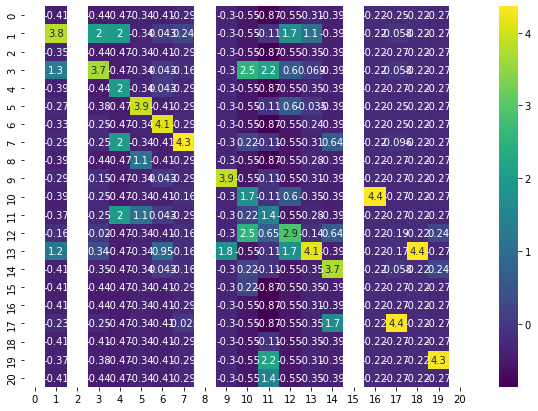

In [22]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
array = confusion_matrix
df_cm = pd.DataFrame(array)
df_norm_col=(df_cm-df_cm.mean())/df_cm.std()
#df_norm_col=df_cm-df_cm.mean()
plt.figure(figsize = (10,7))
sn.heatmap(df_norm_col, annot=True,cmap='viridis')